In [506]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
#import "../computerVision/ExploreOpenCVDnn/track.py"
%matplotlib notebook

In [554]:
data = pickle.load( open('/Users/arygout/Documents/aaStuff/BenchmarkVideos/KalmanFilterTestFiles/Test9/videoDump.pkl', 'rb'))

#40:57 for 7
#16:32 for 8
lowerBound = 0
upperBound = -1

sampling = 2
meas = data['measurement'][lowerBound:upperBound][::sampling]
ts = (data['imageCaptureTimes'] - data['imageCaptureTimes'][0])[lowerBound:upperBound][::sampling]
fs = data['filterState'][lowerBound:upperBound][::sampling]
fc = data['filterCovariance'][lowerBound:upperBound][::sampling]


In [555]:
np.diff(ts)

array([0.38750887, 0.4026382 , 0.42688894, 0.428298  , 0.40018201,
       0.39691997, 0.38646293, 0.43138218, 0.39364886, 0.43621302,
       0.38825274, 0.40892601, 0.38347125, 0.43199396, 0.42677903,
       0.40290594, 0.43157411, 0.38869286, 0.43502903, 0.43013692,
       0.38684106, 0.43979287, 0.39663005, 0.41865325, 0.39608884,
       0.40155005, 0.46561575, 0.39124131, 0.65807271, 0.42638111,
       0.62744713, 0.40072799, 0.39039898, 0.39860487, 0.4302001 ,
       0.42666316, 0.39422679, 0.43561196, 0.39078403, 0.43184304,
       0.42597198, 0.39688921, 0.43477178, 0.39486122, 0.42190576,
       0.39672399, 0.39857507])

<IPython.core.display.Javascript object>


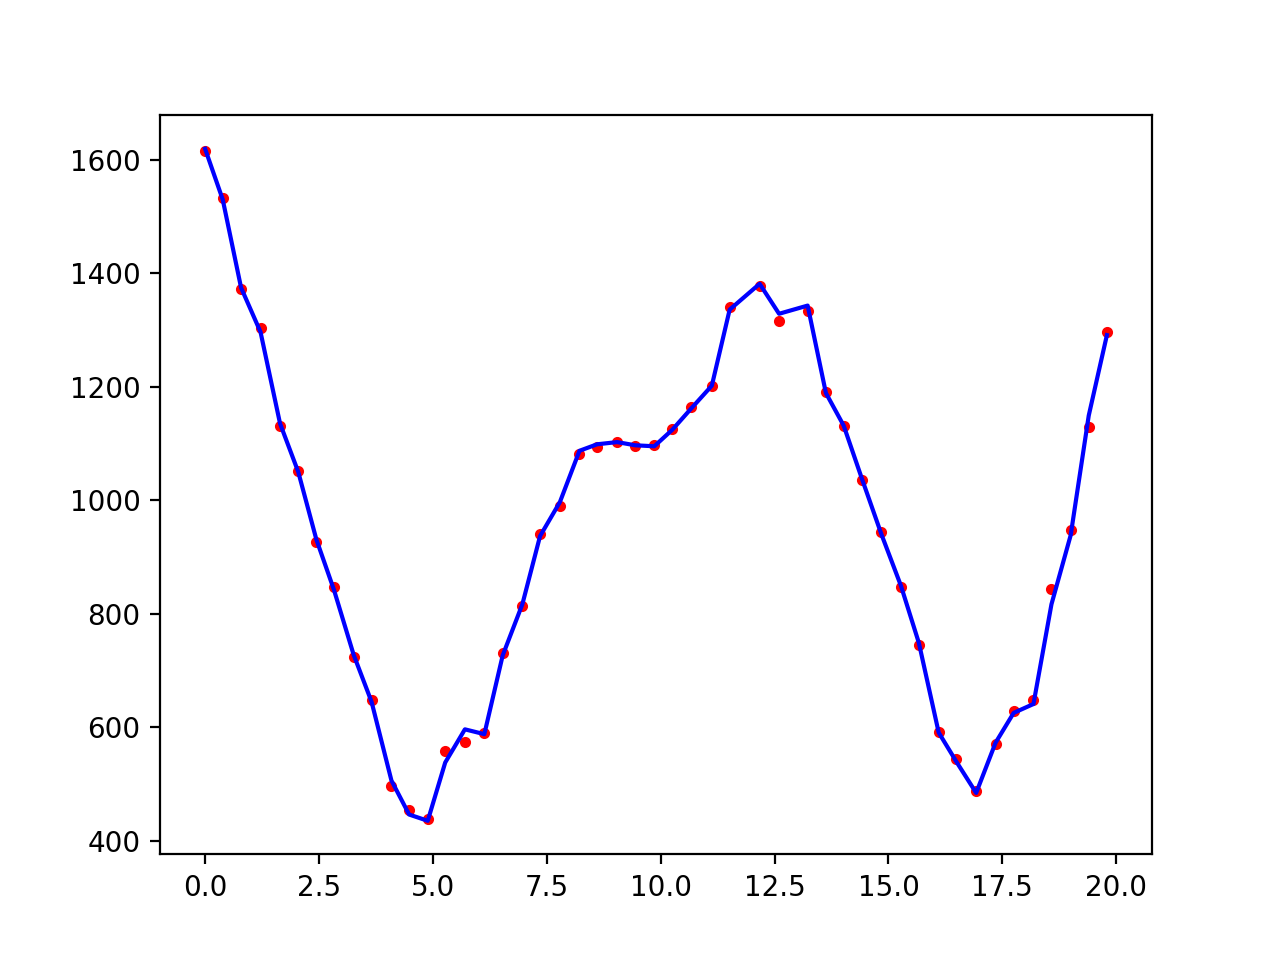

In [556]:
plt.figure()
plt.plot(ts, meas, 'r.')
plt.plot(ts, fs[:,0], 'b-')
plt.show()

In [557]:
nAhead = 1

numPoints = 5

linearFit = np.empty((meas.shape[0] - numPoints - nAhead))

for i in range(meas.shape[0] - numPoints - nAhead):
    fit = np.polyfit(ts[i:i+numPoints],meas[i:i+numPoints],1)
    linearFit[i] = np.polyval(fit, ts[i+numPoints+nAhead])

<IPython.core.display.Javascript object>


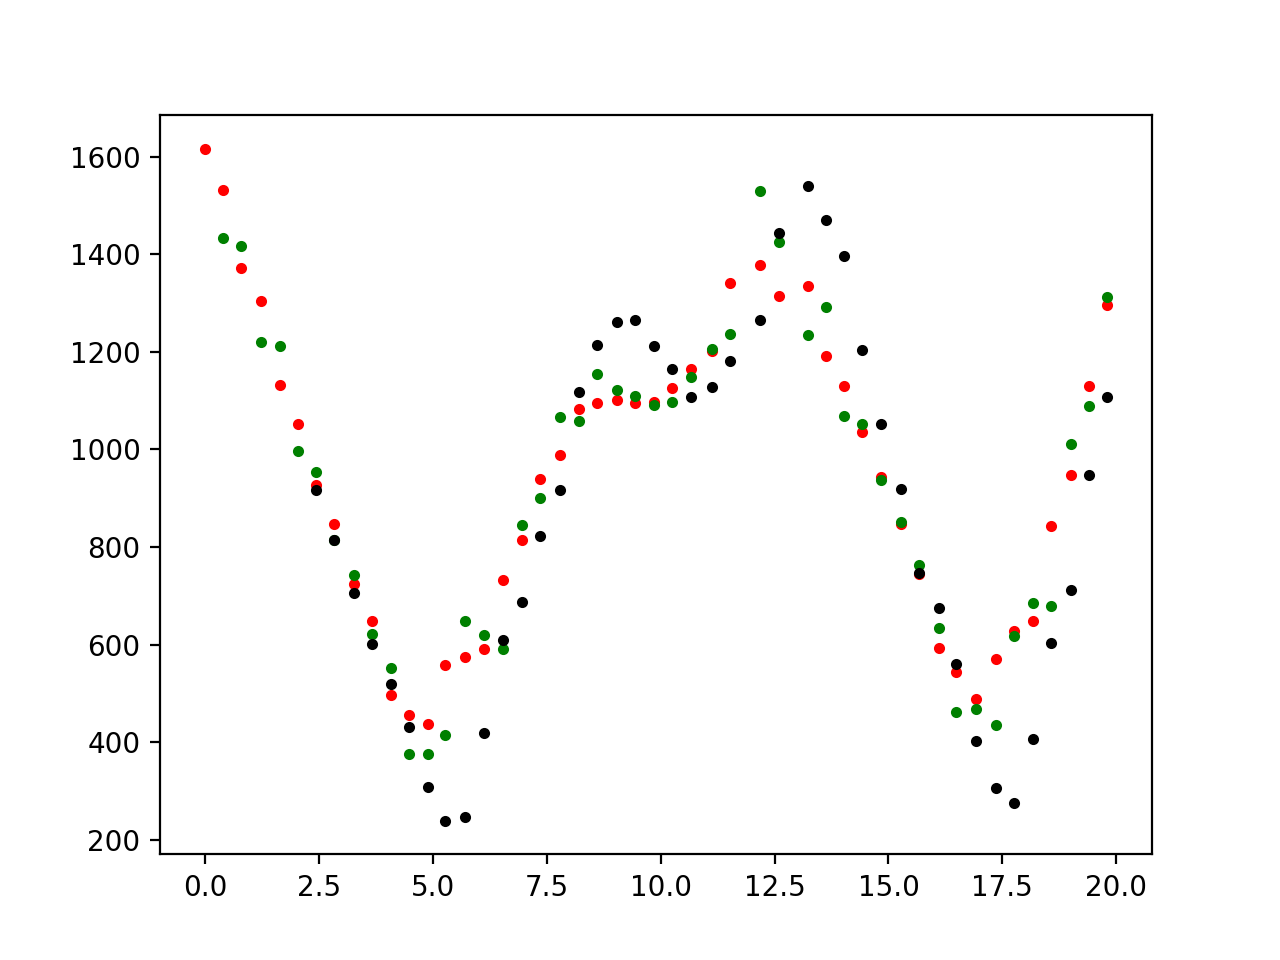

KF mean error: 56.53268616938534
linearFit mean error: 135.78585388369228


In [558]:
plt.figure()
#plt.plot(ts[1:], (fs[:-1,0] + fs[:-1,1] * np.diff(ts)),'b.')
plt.plot(ts, meas,'r.')

plt.plot(ts[nAhead:], (fs[:-nAhead,0] + fs[:-nAhead,1] * (ts[nAhead:] - ts[:-nAhead])),'g.')

plt.plot(ts[numPoints+nAhead:], linearFit, 'k.')

print("KF mean error: {}".format(np.mean(abs((fs[:-nAhead,0] + fs[:-nAhead,1] * (ts[nAhead:] - ts[:-nAhead])) - meas[nAhead:]))))

print("linearFit mean error: {}".format( np.mean(abs((linearFit - meas[numPoints+nAhead:])))))

plt.show()

In [498]:
sampling

1

In [499]:
#plt.hist(data['filterState'][:,0] - data['measurement'],100)

plt.hist(np.diff(ts),100)
plt.show()
print("numts: {}. duration: {}".format(ts.shape[0], 
                                       np.max(ts) - np.min(ts)))

numts: 16. duration: 7.557222843170166


In [500]:
plt.plot(np.diff(ts))

In [501]:
ts = data['imageCaptureTimes']

plt.plot(ts, data['filterState'][:100][:, 1], label = 'velocity pred')
plt.plot(ts[1:], np.diff(data['filterState'][:100][:, 0]), label = 'velocity finite diff')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


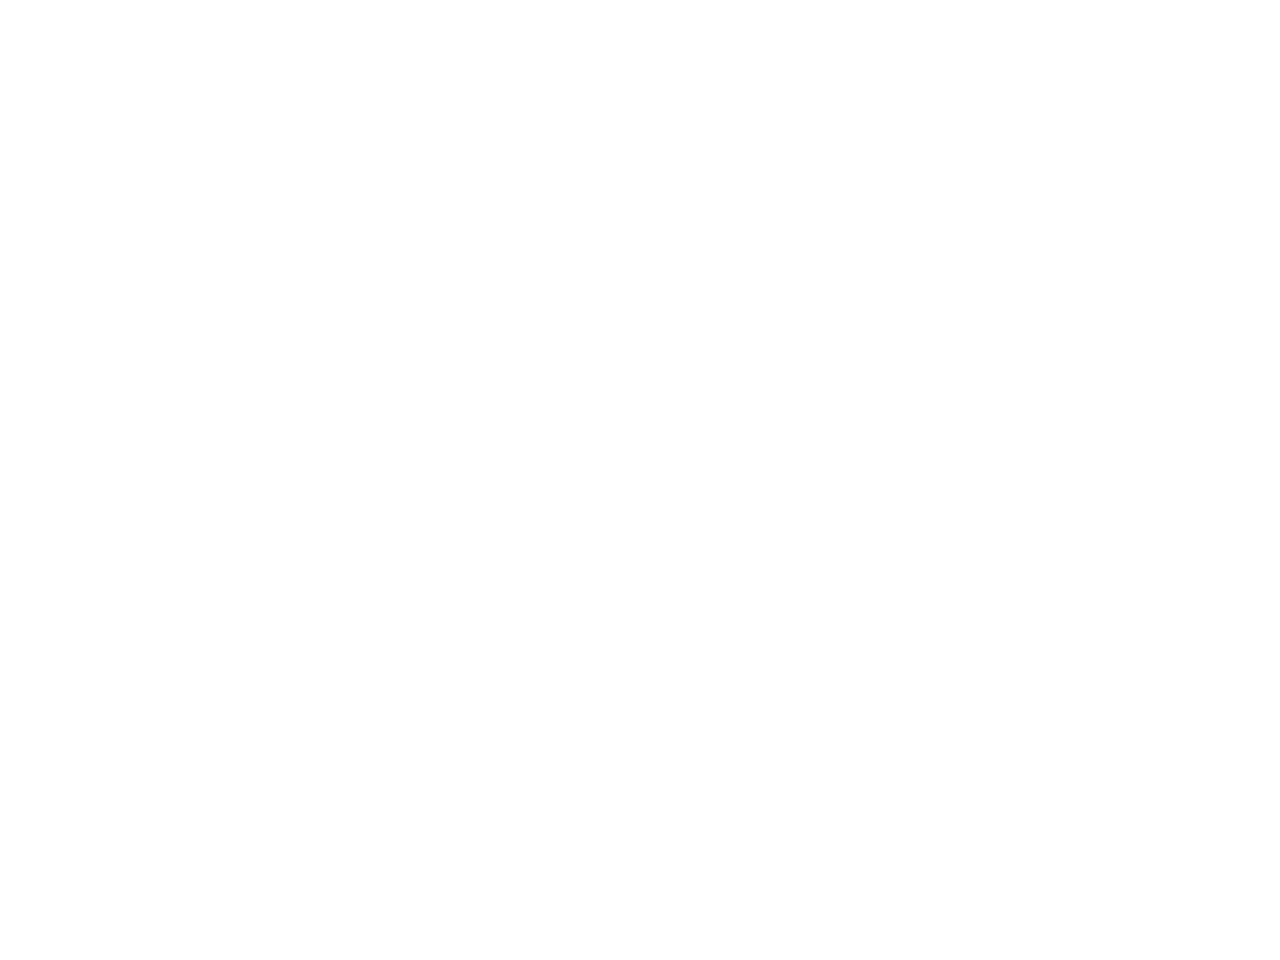

In [502]:
plt.figure()
plt.hist(np.diff(ts),100)
plt.show()

In [503]:
plt.hist(data['measurement'][nAhead:] - (data['filterState'][:-nAhead,0] + data['filterState'][:-nAhead,1] * (ts[nAhead:] - ts[:-nAhead])))


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 29.,  3.]),
 array([-754.20042445, -663.23656255, -572.27270064, -481.30883873,
        -390.34497682, -299.38111492, -208.41725301, -117.4533911 ,
         -26.48952919,   64.47433271,  155.43819462]),
 <a list of 10 Patch objects>)

In [504]:
(fs[:-1,0] + fs[:-1,1] * np.diff(ts))

ValueError: operands could not be broadcast together with shapes (15,) (35,) 